# Single File Diffusion Report

In [1]:
import pims
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=15)

Datasets for this notebook can be found in this [folder](http://gofile.me/2Glht/K8egYxcsX).

# Large Radius $r=10\mu{}m$

The first batch of experiments were done with $N = 11$ particles confined to a large circle of $r=10\mu{}m$. A short sample showing 10 minutes of video is shown below (with a speed of 60x the original). 

In [2]:
video = pims.Video('D:\Experiment1_avi\Experiment1_2018_07_25_09_22_27.avi')

w = 5
fig, ax = plt.subplots(1,1,figsize=(w,w*video[0].shape[0]/video[0].shape[1]))
ax.tick_params(which='both',labelleft = False,labelbottom = False)

def animate(i):
    ax.axis('off')
    ax.imshow(video[3*i])
    ax.tick_params(which='both',labelleft = False, labelbottom = False)
    fig.tight_layout()
    ax.set_title(r"Experiment1 - 1fps - $60\times$speed")
    return ax

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50, blit=False)
plt.close(anim._fig)
HTML(anim.to_html5_video())

This experiment was done in two parts:
* an experiment at low framerate (video Experiment1_2018_07_25_09_22_27)
* and an experiment at high framerate (video Experiment1_2018_07_24_16_18_31)

The mean square displacement of each video was calculated, and then both were joined by ignoring timescales greater than 20 seconds for the high framerate video and lower than 20 seconds for the low framerate video.


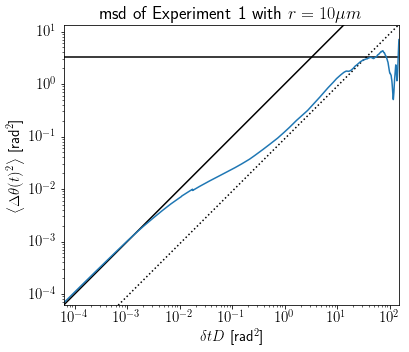

In [3]:
msd_10um = pd.read_csv("D:/Experiment1_avi/Experiment1_MSD.dat",sep = "\t", index_col=[0,1])

D = msd_10um.iloc[0].dt_norm/msd_10um.iloc[0].name[0]
time_range = np.array([np.min(msd_10um.dt_norm),np.max(msd_10um.dt_norm)])

fig, ax = plt.subplots(1,1,figsize=(6,6))

## estimate lines
plt.loglog(time_range,np.pi**2/3*np.ones(np.shape(time_range)),color='k')
plt.loglog(time_range,time_range,color='k')
plt.loglog(time_range,time_range/11,':',color='k')

plt.loglog(msd_10um.groupby("dt").mean().dt_norm,msd_10um.groupby("dt").mean().msd)
plt.xlabel(r"$\delta{}t D$ [rad$^2$]")
plt.ylabel(r"$\left<\Delta\theta(t)^2\right>$ [rad$^2$]")
plt.title("msd of Experiment 1 with $r=10\mu{}m$")

plt.gca().autoscale(enable=True, axis='both', tight=True)
plt.axis("square")
plt.ylim([D/14,np.pi**2/3+10]);

Here the transition to the cluster regime is nicely shown, but we don't have enough statistics for the geometric regime. The dotted line is a line with slope $\frac{D}{N}$. This is my guess as to where the cluster regime should be.

# Small Radius $r = 5\mu{}m$

Since the diffusion constant above is in radians, it already contains the information of the radius. That is; for larger circles, the angle changes more slowly because $\Delta\theta = \frac{\Delta s}{r}$, and therefore the diffusion constant is much smaller. In fact, the diffusion constant must go like $D \propto r^{-2}$. Since our $x$ axis is $\delta t D$, for the same time interval $\delta t$, an experiment with a smaller radius will explore a much longer timescale. This is not very surprising, but I had to write it for me. 

Three experiments were done with $r = 5um$ for different values of the field. The field has not been calibrated, but in arbitrary units the three experiments are $B\in[1,2,3]$

In [4]:
video = pims.Video('D:\Experiment9_avi\Experiment9_2018_09_21_15_37_26.avi')

w = 5
fig, ax = plt.subplots(1,1,figsize=(w,w*video[0].shape[0]/video[0].shape[1]))
ax.tick_params(which='both',labelleft = False,labelbottom = False)

def animate(i):
    ax.axis('off')
    ax.imshow(video[3*i])
    ax.tick_params(
    which='both',
    labelleft = False,
    labelbottom = False)
    fig.tight_layout()
    ax.set_title(r"Experiment9 - 1fps - $60\times$speed")
    return ax

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50, blit=False)
plt.close(anim._fig)

In [5]:
HTML(anim.to_html5_video())

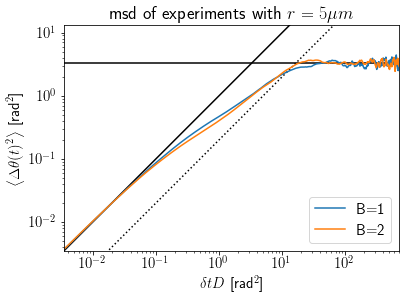

In [6]:
msd_5um_8 = pd.read_csv("D:\Experiment8_avi\Experiment8_2018_09_17_16_58_33_msd.dat",sep="\t",index_col = [0,1])
msd_5um_9 = pd.read_csv("D:\Experiment9_avi\Experiment9_2018_09_21_15_37_26_msd.dat",sep="\t",index_col = [0,1])

D = msd_5um_9.iloc[0].dt_norm/msd_5um_9.iloc[0].name[0]
time_range = np.array([np.min(msd_5um_9.dt_norm),np.max(msd_5um_9.dt_norm)])

fig, ax = plt.subplots(1,1,figsize=(6,6))

## estimate lines
plt.loglog(time_range,np.pi**2/3*np.ones(np.shape(time_range)),color='k')
plt.loglog(time_range,time_range,color='k')
plt.loglog(time_range,time_range/5,':',color='k')

plt.loglog(msd_5um_8.groupby("dt").mean().dt_norm,msd_5um_8.groupby("dt").mean().msd,label="B=1")

plt.loglog(msd_5um_9.groupby("dt").mean().dt_norm,msd_5um_9.groupby("dt").mean().msd,label="B=2")

plt.xlabel(r"$\delta{}t D$ [rad$^2$]")
plt.ylabel(r"$\left<\Delta\theta(t)^2\right>$ [rad$^2$]")
plt.title("msd of experiments with $r = 5\mu{}m$")

plt.gca().autoscale(enable=True, axis='both', tight=True)
plt.axis("square")
plt.ylim([D,np.pi**2/3+10])
plt.legend();

In this case the geometric regime is very clearly reached. However, in this case the cluster regime is not very clear. 

# The contents of the MSD datasets

The MSD datasets can be loaded using `pandas` by writing:

In [7]:
msd_10um = pd.read_csv("D:/Experiment1_avi/Experiment1_MSD.dat",sep = "\t", index_col=[0,1])

In [8]:
msd_10um.head()

msd   dt_norm
dt       id                    
0.071429 0   0.000058  0.000063
         1   0.000060  0.000063
         2   0.000058  0.000063
         3   0.000059  0.000063
         4   0.000061  0.000063

The MSD dataset contains: 
* The index column `dt` contains the time scale $\delta t$ in seconds. 
* The second index contains the id of the particle. The msd was calculated independently for each particle and then averaged
* The MSD is calculated by $\left<\Delta\theta(\delta t)^2\right>$, where we calculate $\Delta\theta(\delta t)$ as:

$$\Delta\theta = 
\begin{cases}
\theta_{t+\delta t}-\theta_{t} & \left|\theta_{t+\delta t}-\theta_{t}\right|\leq\pi \\
sign\left(\theta_{t+\delta t}-\theta_{t}\right)\left[2\pi-\left(\theta_{t+\delta t}-\theta_{t}\right)\right] & \left|\theta_{t+1}-\theta_{t}\right|> \pi\\
\end{cases}
$$
This is to ensure that particles crossing $\theta=0$ have the correct displacement.
* The column `dt_norm` contains $D\delta t$, where $D$ is the slope of the initial part of the MSD. Note that $D$ is a strange diffusion coefficient because it is in $\mathrm{rad}^2/s$